In [1]:
import pathlib
import numpy as np
import pandas as pd
from mimetypes import init
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, date
import matplotlib.pyplot as plt

In [20]:
"""classification,20240328
configuration_1,16.0153562
configuration_2,16.142181
configuration_3,15.852506199999999
configuration_4,16.1629656
configuration_5,15.852838700000001
default,31.222159499999997"""

'classification,20240328\nconfiguration_1,16.0153562\nconfiguration_2,16.142181\nconfiguration_3,15.852506199999999\nconfiguration_4,16.1629656\nconfiguration_5,15.852838700000001\ndefault,31.222159499999997'

In [21]:
df = pd.read_clipboard(sep=',')

In [22]:
df

,classification,20240328,20240330,20240330_only_spark
0,configuration_1,16.015356,16.109491,31.241305
1,configuration_2,16.142181,16.031816,31.677596
2,configuration_3,15.852506,16.041158,31.536580
3,configuration_4,16.162966,15.840919,31.547795
4,configuration_5,15.852839,15.869535,0.000000
5,default,31.222160,31.022122,31.790650


In [29]:
df_columns = list(df.columns)
df_columns.pop(0)
df_columns

['20240328', '20240330', '20240330_only_spark']

In [35]:
df2 = pd.read_clipboard(sep=',')

In [36]:
df2

,config,configuration_1,configuration_2,configuration_3,configuration_4,configuration_5,default
0,20240328,16.015356,16.142181,15.852506,16.162966,15.852839,31.222160
1,20240330,16.109491,16.031816,16.041158,15.840919,15.869535,31.022122
2,20240330_only_spark,31.241305,31.677596,31.536580,31.547795,0.000000,31.790650


In [38]:
runs = df2['config'].tolist()
runs

['20240328', '20240330', '20240330_only_spark']

In [19]:
# criando gráfico analítico

fig = go.Figure()

for column in df_columns:
    fig.add_trace(go.Bar(x=df['classification'],
                        y=df[column],
                        name=column,
                        marker=dict(color='rgb(65,65,65)'))
            )

fig.update_layout(barmode='stack')

updatemenu = []
buttons = []

buttons.append(dict(method='update',
                        label='Todos',
                        args=[{'visible':[True], 'y':[df['20240328']],  
                        'x':[df['classification']],
                        'type':'bar'},
                        {'title': '<b>20240328</b>'}]
                        )
                )



for run in runs:
        buttons.append(dict(method='update',
                                label=run,
                                args=[{'visible':[True, True, True, True, True],'y':[df[df['config']==run]['configuration_1'], df[df['config']==run]['configuration_2'], df[df['config']==run]['configuration_3'], df[df['config']==run]['configuration_4'], df[df['config']==run]['configuration_5']],  
                                'x':[df[df['_shopping']==shopping]['_collected_at']],
                                'type':'bar'},
                                {"title": f'<b>Visão Analítica - MultiVocê - {shopping}</b>',
                                "annotations": []}
                                ]
                                )
                            )

updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'right'
updatemenu[0]['showactive'] = True

fig.write_html(f"graph.html")

In [61]:
import pandas as pd
import plotly.graph_objects as go

# Dados fornecidos
data = {
    'config': ['20240328', '20240330', '20240330_only_spark'],
    'configuration_1': [16.0153562, 16.109491, 31.2413048],
    'configuration_2': [16.142181, 16.0318159, 31.6775965],
    'configuration_3': [15.852506199999999, 16.041157899999998, 31.5365796],
    'configuration_4': [16.1629656, 15.8409186, 31.5477953],
    'configuration_5': [15.852838700000001, 15.869535099999998, 0],
    'default': [31.222159499999997, 31.022122200000002, 31.7906497]
}

# Criar DataFrame a partir dos dados
df = pd.DataFrame(data)

# Coletar todos os valores únicos do campo "config"
unique_configs = df['config'].unique()

# Criar o gráfico de barras
fig = go.Figure()

# Adicionar as barras para cada configuração
for i, config in enumerate(unique_configs):
    print(i)
    rgb1 = i*25
    rgb2 = i*30 
    rgb3 = i*45
    fig.add_trace(go.Bar(
        x=df.columns[1:],
        y=df[df['config'] == config].iloc[0, 1:],
        name=config,
        marker_color=f'rgb({rgb1}, {rgb2}, {rgb3})'  # Cinza
    ))

# Criar botões para cada valor único no campo "config"
buttons = []
for config in unique_configs:
    buttons.append(
        dict(
            label=config,
            method='update',
            args=[{'visible': [True if col == config else False for col in unique_configs]}],
            args2=[{'y': [df[df['config'] == config].iloc[0, 1:]]}]
        )
    )

# Adicionar botão para mostrar todos os gráficos
buttons.append(
    dict(
        label="Show All",
        method="update",
        args=[{"visible": [True] * len(unique_configs)}],
        args2=[{'y': df.iloc[:, 1:].values.tolist()}]
    )
)

# Adicionar botões ao layout
fig.update_layout(
    updatemenus=[
        dict(
            buttons=buttons,
            direction='down',
            showactive=True,
            x=0.2,
            xanchor='left',
            y=1.15,
            yanchor='top'
        )
    ],
    title='Experimentos',
    xaxis_title='Configuração',
    yaxis_title='Média (segundos)'
)

fig.write_html(f"graph.html")

0
1
2


In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')

app = Dash(__name__)

app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'Canada', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

if __name__ == '__main__':
    app.run(debug=True)

In [64]:
import pandas as pd

# Dados fornecidos
data = {
    'config': ['20240328', '20240330', '20240330_only_spark', '20240330_only_cassandra', '20230402', '20230402_only_spark', '20230402_instances_default'],
    'configuration_1': [16.0153562, 16.109491, 31.2413048, 16.763625400000002, 16.0631024, 31.3581946, 16.1011728],
    'configuration_2': [16.142181, 16.0318159, 31.6775965, 16.9564536, 16.188971900000002, 31.0322206, 16.1380133],
    'configuration_3': [15.852506199999999, 16.041157899999998, 31.5365796, 16.7198404, 16.1448714, 31.3146187, 16.292319],
    'configuration_4': [16.1629656, 15.8409186, 31.5477953, 16.7571328, 16.100718, 31.341838799999998, 16.3846836],
    'configuration_5': [15.852838700000001, 15.869535099999998, 0, 0, 16.241861, 31.159679699999998, 16.3562929],
    'default': [31.222159499999997, 31.022122200000002, 31.7906497, 31.540408000000003, 31.4165415, 31.159679699999998, 31.3841163]
}

# Criar DataFrame a partir dos dados
df = pd.DataFrame(data)

# Pivotear os dados
pivot_df = df.pivot_table(index='config', values=['configuration_1', 'configuration_2', 'configuration_3', 'configuration_4', 'configuration_5', 'default'])

# Remover o nome do índice
pivot_df.index.name = None

# Resetar o índice
pivot_df.reset_index(inplace=True)

# Exibir o DataFrame pivotado
pivot_df

,index,configuration_1,configuration_2,configuration_3,configuration_4,configuration_5,default
0,20230402,16.063102,16.188972,16.144871,16.100718,16.241861,31.416542
1,20230402_instances_default,16.101173,16.138013,16.292319,16.384684,16.356293,31.384116
2,20230402_only_spark,31.358195,31.032221,31.314619,31.341839,31.159680,31.159680
3,20240328,16.015356,16.142181,15.852506,16.162966,15.852839,31.222159
4,20240330,16.109491,16.031816,16.041158,15.840919,15.869535,31.022122
5,20240330_only_cassandra,16.763625,16.956454,16.719840,16.757133,0.000000,31.540408
6,20240330_only_spark,31.241305,31.677596,31.536580,31.547795,0.000000,31.790650


In [65]:
import pandas as pd

# Dados fornecidos
data = {
    'config': ['20240328', '20240330', '20240330_only_spark', '20240330_only_cassandra', '20230402', '20230402_only_spark', '20230402_instances_default'],
    'configuration_1': [16.0153562, 16.109491, 31.2413048, 16.763625400000002, 16.0631024, 31.3581946, 16.1011728],
    'configuration_2': [16.142181, 16.0318159, 31.6775965, 16.9564536, 16.188971900000002, 31.0322206, 16.1380133],
    'configuration_3': [15.852506199999999, 16.041157899999998, 31.5365796, 16.7198404, 16.1448714, 31.3146187, 16.292319],
    'configuration_4': [16.1629656, 15.8409186, 31.5477953, 16.7571328, 16.100718, 31.341838799999998, 16.3846836],
    'configuration_5': [15.852838700000001, 15.869535099999998, 0, 0, 16.241861, 31.159679699999998, 16.3562929],
    'default': [31.222159499999997, 31.022122200000002, 31.7906497, 31.540408000000003, 31.4165415, 31.159679699999998, 31.3841163]
}

# Criar DataFrame a partir dos dados
df = pd.DataFrame(data)

# Converter os dados para o formato de tabela
melted_df = pd.melt(df, id_vars=['config'], var_name='experiment', value_name='value')

# Exibir o DataFrame no formato desejado
print(melted_df)

                        config       experiment      value
0                     20240328  configuration_1  16.015356
1                     20240330  configuration_1  16.109491
2          20240330_only_spark  configuration_1  31.241305
3      20240330_only_cassandra  configuration_1  16.763625
4                     20230402  configuration_1  16.063102
5          20230402_only_spark  configuration_1  31.358195
6   20230402_instances_default  configuration_1  16.101173
7                     20240328  configuration_2  16.142181
8                     20240330  configuration_2  16.031816
9          20240330_only_spark  configuration_2  31.677596
10     20240330_only_cassandra  configuration_2  16.956454
11                    20230402  configuration_2  16.188972
12         20230402_only_spark  configuration_2  31.032221
13  20230402_instances_default  configuration_2  16.138013
14                    20240328  configuration_3  15.852506
15                    20240330  configuration_3  16.0411

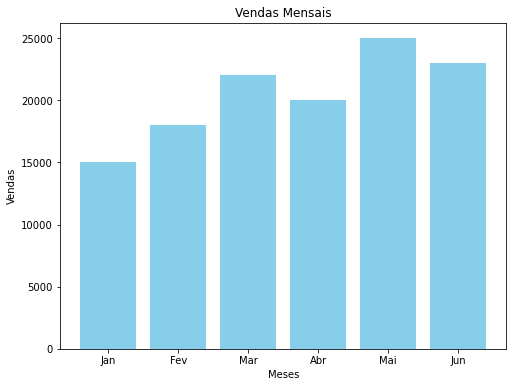

In [2]:
# Dados de exemplo (vendas mensais)
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun']
vendas = [15000, 18000, 22000, 20000, 25000, 23000]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.bar(meses, vendas, color='skyblue')  # Plota o gráfico de barras
plt.title('Vendas Mensais')  # Define o título do gráfico
plt.xlabel('Meses')  # Define o rótulo do eixo x
plt.ylabel('Vendas')  # Define o rótulo do eixo y

# Mostra o gráfico
plt.show()

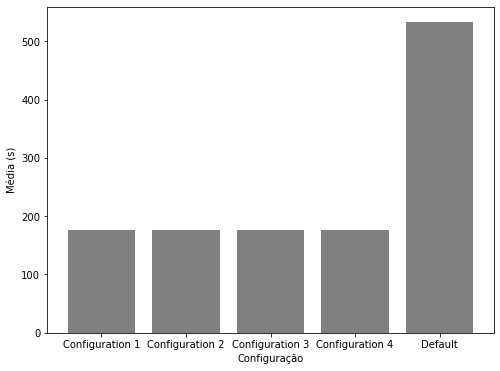

In [7]:
# Dados de exemplo (vendas mensais)
meses = ['Configuration 1', 'Configuration 2', 'Configuration 3', 'Configuration 4', 'Default']
vendas = [176.5962022, 176.00921, 176.1499423, 176.537801, 532.7230515]

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.bar(meses, vendas, color='grey')  # Plota o gráfico de barras
#plt.title('Média de Tempo por Configuração')  # Define o título do gráfico
plt.xlabel('Configuração')  # Define o rótulo do eixo x
plt.ylabel('Média (s)')  # Define o rótulo do eixo y

# Mostra o gráfico
plt.show()

plt.savefig('meu_grafico.png')

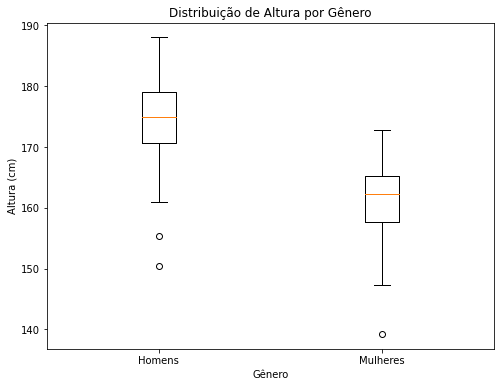

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo (altura em centímetros)
altura_homens = np.random.normal(loc=175, scale=7, size=100)
altura_mulheres = np.random.normal(loc=162, scale=6, size=100)

# Criando o boxplot
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.boxplot([altura_homens, altura_mulheres], labels=['Homens', 'Mulheres'])  # Plota o boxplot
plt.title('Distribuição de Altura por Gênero')  # Define o título do gráfico
plt.xlabel('Gênero')  # Define o rótulo do eixo x
plt.ylabel('Altura (cm)')  # Define o rótulo do eixo y

# Mostra o boxplot
plt.show()

<Figure size 576x432 with 0 Axes>

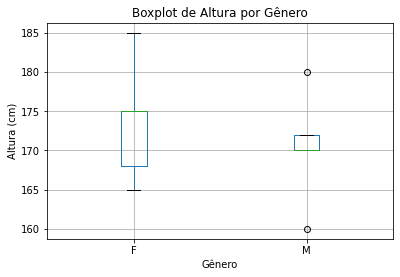

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemplo de DataFrame com altura e gênero
dados = {
    'altura': [170, 165, 180, 175, 160, 168, 172, 185, 170, 175],
    'gênero': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F']
}

df = pd.DataFrame(dados)

# Calcular o boxplot por gênero
plt.figure(figsize=(8, 6))
df.boxplot(column='altura', by='gênero')
plt.title('Boxplot de Altura por Gênero') 
plt.xlabel('Gênero')
plt.ylabel('Altura (cm)')
plt.suptitle('')  # Remover o título padrão do boxplot
plt.show()